In [1]:
# Render plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 5)
from IPython.display import Image

In [3]:
def make_df(csv_path):
    """
    Generates a pandas DataFrame for the
    data given in the csv file specified
    by the 'csv_path'.

    Argument:
        csv_path - specifies path to desired csv file
    Returns:
        pandas DataFrame with data from csv file specified in csv_path
        
    """
    return pd.read_csv(csv_path, header=None, names=['x', 'y'], index_col=False)

In [4]:
def make_data_matrix(x_values, degree):
    """
    Generates a N x (degree+1) dimension
    matrix from the input values (x values)
    of the given dataset. The ith feature (column)
    in the matrix (i=0 to degree+1 (exclusive))
    is - the N input points raised to the power i.
    
    Arguments:
        x_values - list containing the input data points
        degree - desired degree of the polynomial
    Returns:
        An Nx(degree+1) matrix where ith feature/column
        is the N data points raised to the power i
    """
    X_data = []
    for x_val in x_values:
        col = []
        for power in range(degree+1):
            col.append(x_val ** power)
        X_data.append(col)
    X_matrix = np.array(X_data)
    return X_matrix

In [5]:
def find_params_vector(data_matrix, y_values):
    """
    Finds the vector of coefficients or, the paramter
    vector that will minimize our loss function. The closed
    form solution for w, where w is the parameter vector, is - 
            w* = [{(X^T)X}^-1](X^T)y
            where -
                X = parameter 'data_matrix' mentioned below
                y = parameter 'y_values' mentioned below
                
    The closed form solution can also be seen by running the following - 
        "Image(filename='closed_form_soln.png')".

    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        y_values - list of output data points from given dataset
    Returns:
        A vector containing the values for the parameters that
        minimize the error function (i.e. solution obtained for w*)
    """
    data_product = (data_matrix.T).dot(data_matrix)
    inv_product = np.linalg.inv(data_product)
    params_vector = (inv_product.dot(data_matrix.T)).dot(y_values)
    return params_vector

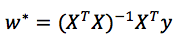

In [6]:
Image(filename='closed_form_soln.png')

In [7]:
def find_predictions(data_matrix, params_vector):
    """
    Gives a Nx1 vector where each entry is the predicted
    value for y, which is calculated using the parameters vector
    obtained from the find_params_vector() method and a row/example
    from the data matrix.
    
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
    """
    return np.array([row.dot(params_vector) for row in data_matrix])

In [8]:
def find_mse(data_matrix, params_vector, y_values):
    """
    Steps for finding the Mean Square Error - 
    1. Get the prediction values for the input
        data points based on the model found.
    2. Calculate the error vector by differencing
        the vector containing target values and 
        the vector containing the predicted values.
    3. Take the square of the errors found and sum them 
        by taking dot product of the error vector with itself.
    4. Calculate the MSE by dividing the sum of the
        squares of errors with the number of input data points.
        
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
        y_values - list of output data points from given dataset
    Returns:
        Mean Square Error of model for given data set
    """
    y_predictions = find_predictions(data_matrix, params_vector)
    error = y_values - y_predictions
    error_square = error.dot(error)
    mse = error_square/len(y_values)
    return mse

In [9]:
######## PART 2.1 ########

In [10]:
###### 2.1.(a) ######

In [11]:
train_df = make_df('./Datasets/Dataset_1_train.csv')

In [12]:
train_x = train_df['x']
train_y = train_df['y']

In [13]:
train_matrix = make_data_matrix(train_x, 20)

In [14]:
params_vector = find_params_vector(train_matrix, train_y)

In [15]:
train_mse = find_mse(train_matrix, params_vector, train_y)

In [16]:
valid_df = make_df('./Datasets/Dataset_1_valid.csv')

In [17]:
valid_x = valid_df['x']
valid_y = valid_df['y']

In [18]:
valid_matrix = make_data_matrix(valid_x, 20)

In [19]:
valid_mse = find_mse(valid_matrix, params_vector, valid_y)

In [20]:
print(train_mse)

6.474766080931443


In [21]:
print(valid_mse)

1419.5725161143287


In [22]:
###### 2.1.(b) ######

In [23]:
# since input data points range between (-1, 1),
# generate 50 data points at equal intervals so
# that we can make predictions for them and check
# the fit of the model against the given datasets
x_values_for_plot = np.arange(-1, 1, 0.04)

In [24]:
plot_matrix = make_data_matrix(x_values_for_plot, 20)

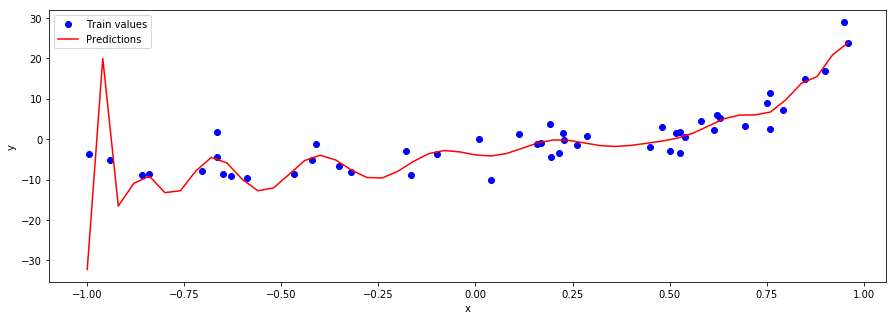

In [25]:
# plotting the output data points from the training data
# set versus the model found from the closed-form solution
plt.plot(train_x, train_y, 'bo', label='Train values')
plt.plot(x_values_for_plot, find_predictions(plot_matrix, params_vector), 'r', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

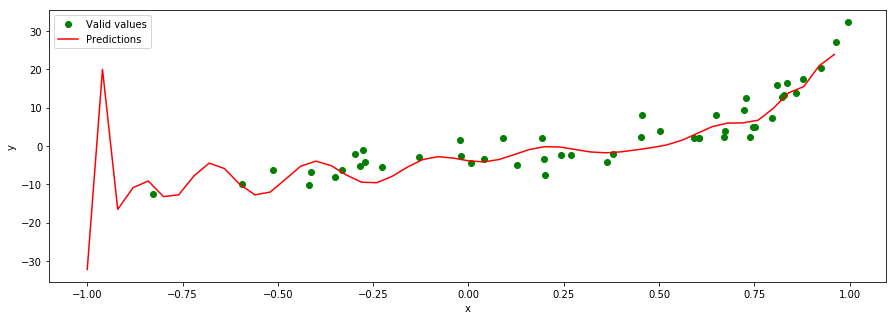

In [26]:
# plotting the output data points from the validation data
# set versus the model found from the closed-form solution
plt.plot(valid_x, valid_y, 'go', label='Valid values')
plt.plot(x_values_for_plot, find_predictions(plot_matrix, params_vector), 'r', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
###### 2.1.(c) ######

In [28]:
"""
The model is overfitting since the validation error (1419.5725161143287) is very
large compared to the training error (6.474766080931443). This is a clear sign
that the model is highly tuned to the training data set since when we introduced
the model to new data (from the validation set), the error increased dramatically.
"""

'\nThe model is overfitting since the validation error (1419.5725161143287) is very\nlarge compared to the training error (6.474766080931443). This is a clear sign\nthat the model is highly tuned to the training data set since when we introduced\nthe model to new data (from the validation set), the error increased dramatically.\n'

In [29]:
######## PART 2.2 ########

In [30]:
###### 2.2.(a) ######

In [31]:
def find_params_l2_regul(data_matrix, y_values, lambda_val):
    """
    Finds the vector of coefficients or, the paramter
    vector that will minimize our loss function (subject 
    to regularization). The closed form solution for w, 
    where w is the parameter vector, is - 
            w* = [{(X^T)X + lambda*I}^-1](X^T)y
            where -
                X = parameter 'data_matrix' mentioned below
                y = parameter 'y_values' mentioned below
                lambda = regularization coefficient
                I = identity matrix of rank (degree+1)
                
    The closed form solution can also be seen by running the following - 
        "Image(filename='L2_Regularization.png')".

    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        y_values - list of output data points from given dataset
        lambda_val - regularization coefficient
    Returns:
        A vector containing the values for the parameters that
        minimize the error function (i.e. solution obtained for w*)
    """
    data_product = (data_matrix.T).dot(data_matrix)
    product_sum_regul_term = data_product + np.eye(len(data_matrix[0])) * lambda_val
    inv_sum = np.linalg.inv(product_sum_regul_term)
    params_vector_l2_reg = (inv_sum.dot(data_matrix.T)).dot(y_values)
    return params_vector_l2_reg

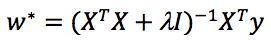

In [32]:
Image(filename='L2_Regularization.png')

In [33]:
# lists to store the different training MSEs
# and validation MSEs obtained for the 
# different values of lambda
list_train_mses = []
list_valid_mses = []
# creating 50 spread out values of 
# lambda in the interval (0, 1)
lambda_vals = np.arange(0, 1, 0.02)
for lambda_val in lambda_vals:
    # finding the parameters for the model
    # under the conditions of regularization
    params_vector_l2_reg = find_params_l2_regul(train_matrix, train_y, lambda_val)
    train_mse = find_mse(train_matrix, params_vector_l2_reg, train_y)
    valid_mse = find_mse(valid_matrix, params_vector_l2_reg, valid_y)
    list_train_mses.append(train_mse)
    list_valid_mses.append(valid_mse)

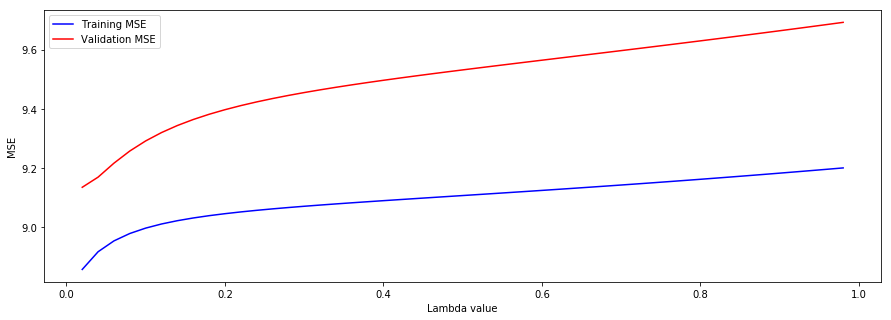

In [34]:
# Plotting the training MSEs and validation
# MSEs for different values of lambda
plt.plot(lambda_vals[1:], list_train_mses[1:], 'b', label='Training MSE')
plt.plot(lambda_vals[1:], list_valid_mses[1:], 'r', label='Validation MSE')
plt.xlabel('Lambda value')
plt.ylabel('MSE')
plt.legend()
plt.show()

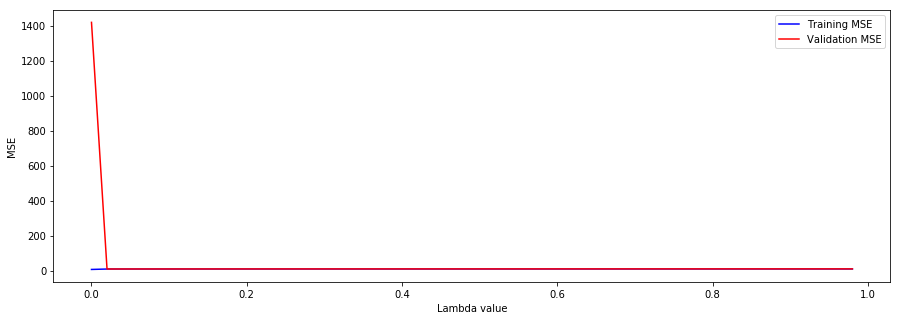

In [35]:
plt.plot(lambda_vals, list_train_mses, 'b', label='Training MSE')
plt.plot(lambda_vals, list_valid_mses, 'r', label='Validation MSE')
plt.xlabel('Lambda value')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [36]:
###### 2.2.(b) ######

In [37]:
# Finding the minimum validation MSE
# and the value of lambda that produced it
min_valid_mse = min(list_valid_mses)
min_valid_mse_idx = list_valid_mses.index(min_valid_mse)
best_lambda = lambda_vals[min_valid_mse_idx]

In [38]:
print("Minimum Validation MSE:", min_valid_mse)
print("Best lambda:", best_lambda)

Minimum Validation MSE: 9.135098784694307
Best lambda: 0.02


In [39]:
best_params_vector_l2_reg = find_params_l2_regul(train_matrix, train_y, best_lambda)

In [40]:
test_df = make_df('./Datasets/Dataset_1_test.csv')

In [41]:
test_x = test_df['x']
test_y = test_df['y']

In [42]:
test_matrix = make_data_matrix(test_x, 20)

In [43]:
test_mse = find_mse(test_matrix, best_params_vector_l2_reg, test_y)

In [44]:
print("Test MSE:", test_mse)

Test MSE: 10.73021840092746


In [45]:
###### 2.2.(c) ######

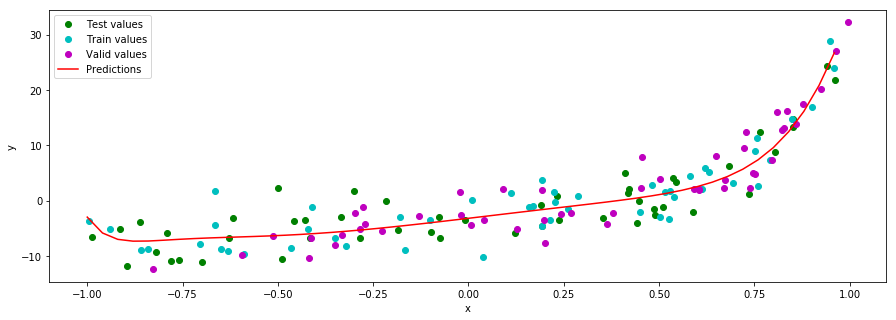

In [46]:
plt.plot(test_x, test_y, 'go', label='Test values')
plt.plot(train_x, train_y, 'co', label='Train values')
plt.plot(valid_x, valid_y, 'mo', label='Valid values')
plt.plot(x_values_for_plot, find_predictions(plot_matrix, best_params_vector_l2_reg), 'r', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
###### 2.2.(d) ######

In [48]:
best_train_mse = find_mse(train_matrix, best_params_vector_l2_reg, train_y)
best_valid_mse = find_mse(valid_matrix, best_params_vector_l2_reg, valid_y)
best_test_mse = find_mse(test_matrix, best_params_vector_l2_reg, test_y)

In [49]:
print("Best:-")
print("Train MSE:", best_train_mse)
print("Valid MSE:", best_valid_mse)
print("Test MSE:", best_test_mse)

Best:-
Train MSE: 8.85765667763102
Valid MSE: 9.135098784694307
Test MSE: 10.73021840092746


In [50]:
"""
Model is not overfitting/underfitting since the errors obtained for the 3 datasets
are all in the same ball park. None of them is too high or too low compared to the others.
"""

'\nModel is not overfitting/underfitting since the errors obtained for the 3 datasets\nare all in the same ball park. None of them is too high or too low compared to the others.\n'

In [51]:
######## PART 2.3 ########

In [52]:
"""
The degree of the source polynomial from the visualization
produced in the previous question seems to be 2. The function
seems to have a minimum in the middle region and is increasing
on either sides.
"""

'\nThe degree of the source polynomial from the visualization\nproduced in the previous question seems to be 2. The function\nseems to have a minimum in the middle region and is increasing\non either sides.\n'

In [53]:
for index, param in enumerate(best_params_vector_l2_reg):
    print(index, ':', param)

0 : -3.1895175369382422
1 : 8.175883958132497
2 : 0.6112151148010956
3 : -5.4698920901688535
4 : 5.797558883882184
5 : 7.122666099360175
6 : 3.360904669983391
7 : 7.5188097698382546
8 : 1.8298297252901023
9 : 4.9222903402159
10 : 1.7299674708988768
11 : 2.2024896678153985
12 : 1.9859033354714088
13 : 0.06219120025704106
14 : 1.9550070267278925
15 : -1.3879381523052363
16 : 1.456386519831753
17 : -2.218418916326774
18 : 0.5389623554156411
19 : -2.5525946232371037
20 : -0.6736889899083081
